In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [52]:
mall_data = pd.read_csv('Mall_Customers.csv')

In [53]:
features = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']].values


In [54]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)


In [55]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(normalized_features)
    wcss.append(kmeans.inertia_)

c:\Users\Karthikeyan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Karthikeyan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Karthikeyan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Karthikeyan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto

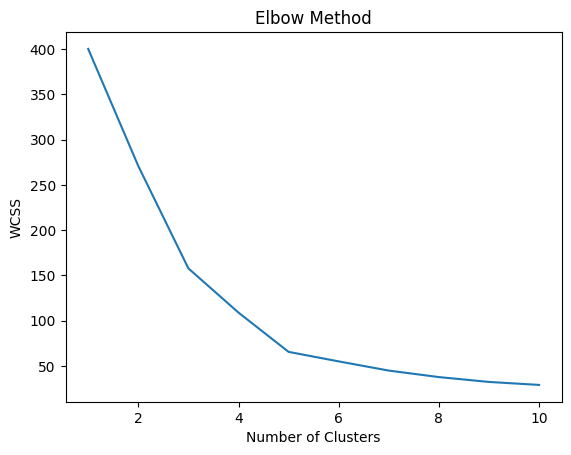

In [56]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [57]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(normalized_features)


c:\Users\Karthikeyan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [58]:
mall_data['Cluster'] = kmeans.labels_

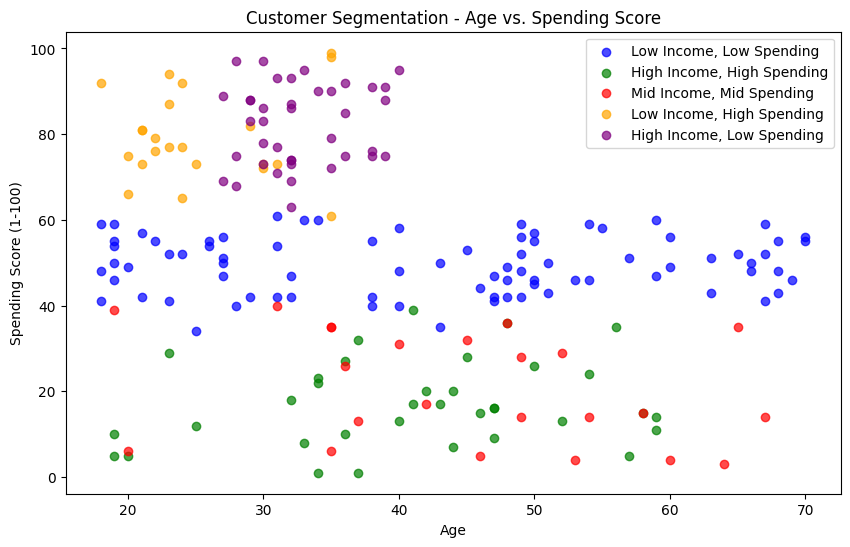

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define cluster names
cluster_names = {
    0: 'Low Income, Low Spending',
    1: 'High Income, High Spending',
    2: 'Mid Income, Mid Spending',
    3: 'Low Income, High Spending',
    4: 'High Income, Low Spending'
}

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'orange', 'purple']

mall_data['Cluster Name'] = mall_data['Cluster'].map(cluster_names)

for cluster in range(5):
    cluster_data = mall_data[mall_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Spending Score (1-100)'],
                c=colors[cluster], label=cluster_names[cluster], alpha=0.7)

plt.title('Customer Segmentation - Age vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()



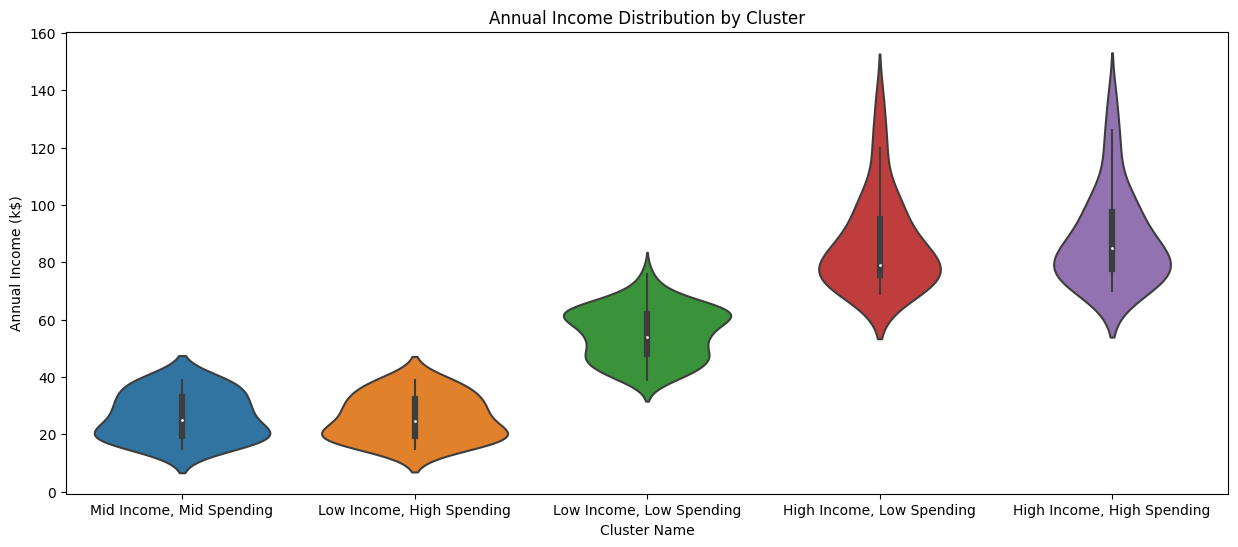

In [60]:
plt.figure(figsize=(15, 6))
sns.violinplot(x='Cluster Name', y='Annual Income (k$)', data=mall_data)
plt.title('Annual Income Distribution by Cluster')
plt.show()


In [61]:
cluster_means = mall_data.groupby('Cluster').mean()
print(cluster_means)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         86.320988  42.716049           55.296296               49.518519
1        164.371429  41.114286           88.200000               17.114286
2         23.000000  45.217391           26.304348               20.913043
3         23.090909  25.272727           25.727273               79.363636
4        162.000000  32.692308           86.538462               82.128205


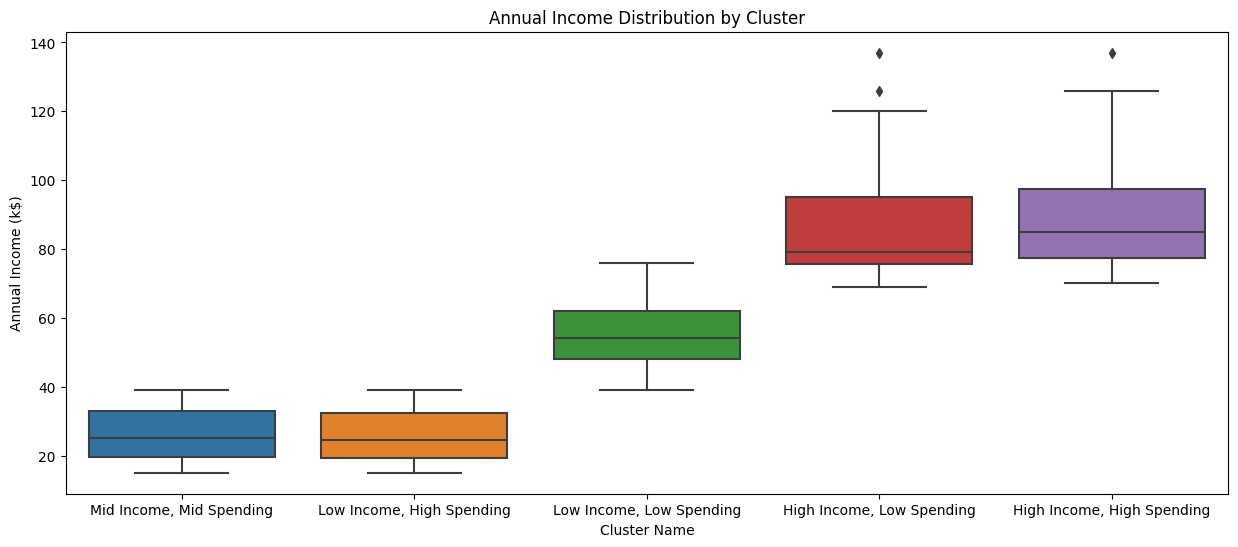

In [62]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Cluster Name', y='Annual Income (k$)', data=mall_data)
plt.title('Annual Income Distribution by Cluster')
plt.show()



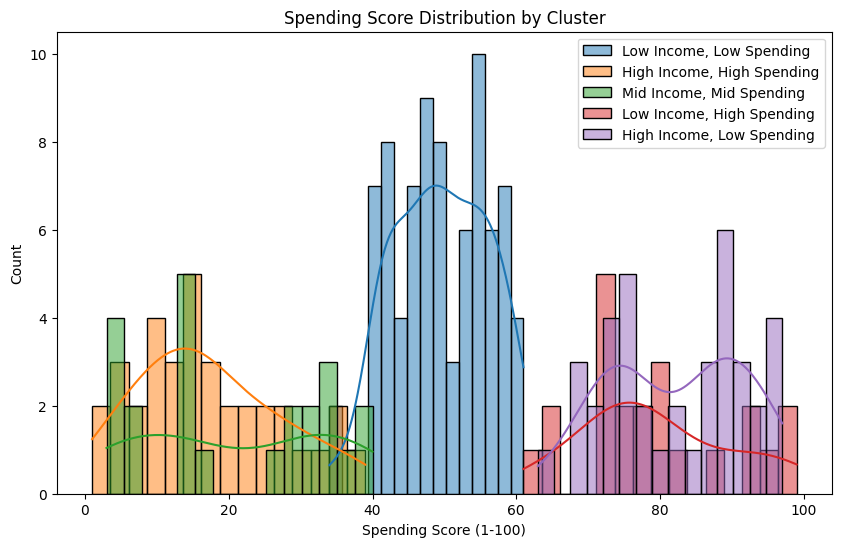

In [63]:
plt.figure(figsize=(10, 6))
for cluster in range(5):
    cluster_data = mall_data[mall_data['Cluster'] == cluster]
    sns.histplot(data=cluster_data, x='Spending Score (1-100)', bins=15, kde=True,
                 label=cluster_names[cluster])
plt.legend()
plt.title('Spending Score Distribution by Cluster')
plt.show()



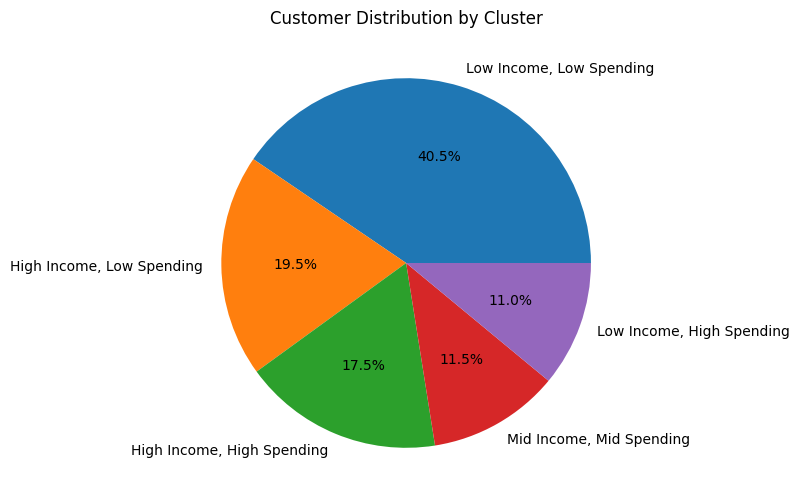

In [64]:
mall_data['Cluster'] = kmeans.labels_
cluster_names = {
    0: 'Low Income, Low Spending',
    1: 'High Income, High Spending',
    2: 'Mid Income, Mid Spending',
    3: 'Low Income, High Spending',
    4: 'High Income, Low Spending'
}
mall_data['Cluster Name'] = mall_data['Cluster'].map(cluster_names)
cluster_distribution = mall_data['Cluster Name'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(cluster_distribution, labels=cluster_distribution.index, autopct='%1.1f%%')
plt.title('Customer Distribution by Cluster')
plt.show()


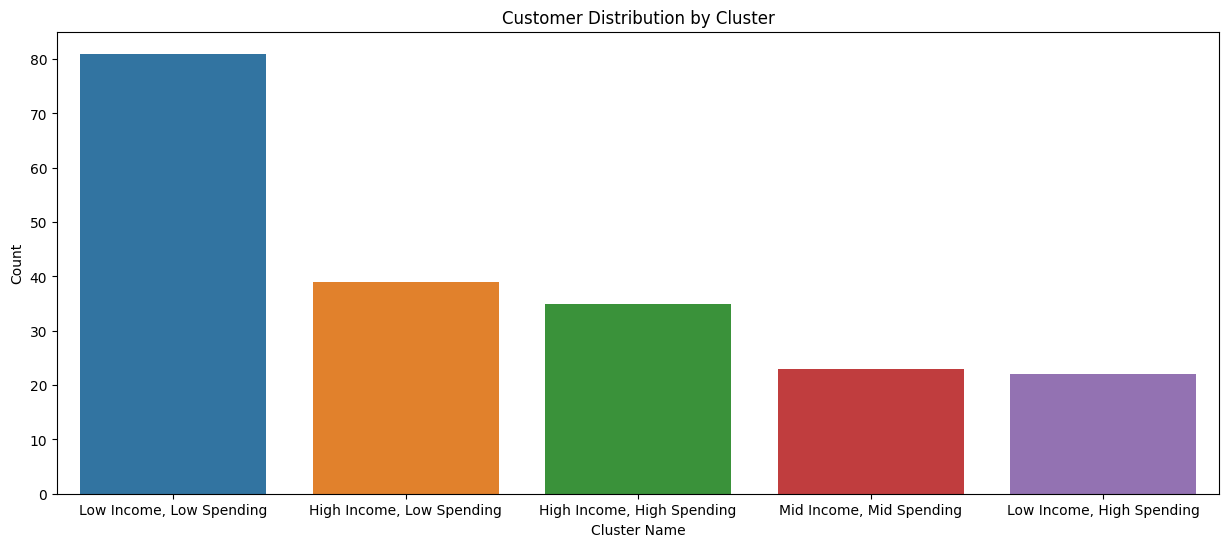

In [65]:
cluster_counts = mall_data['Cluster Name'].value_counts()
plt.figure(figsize=(15, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title('Customer Distribution by Cluster')
plt.xlabel('Cluster Name')
plt.ylabel('Count')
plt.show()


<Figure size 1000x1000 with 0 Axes>

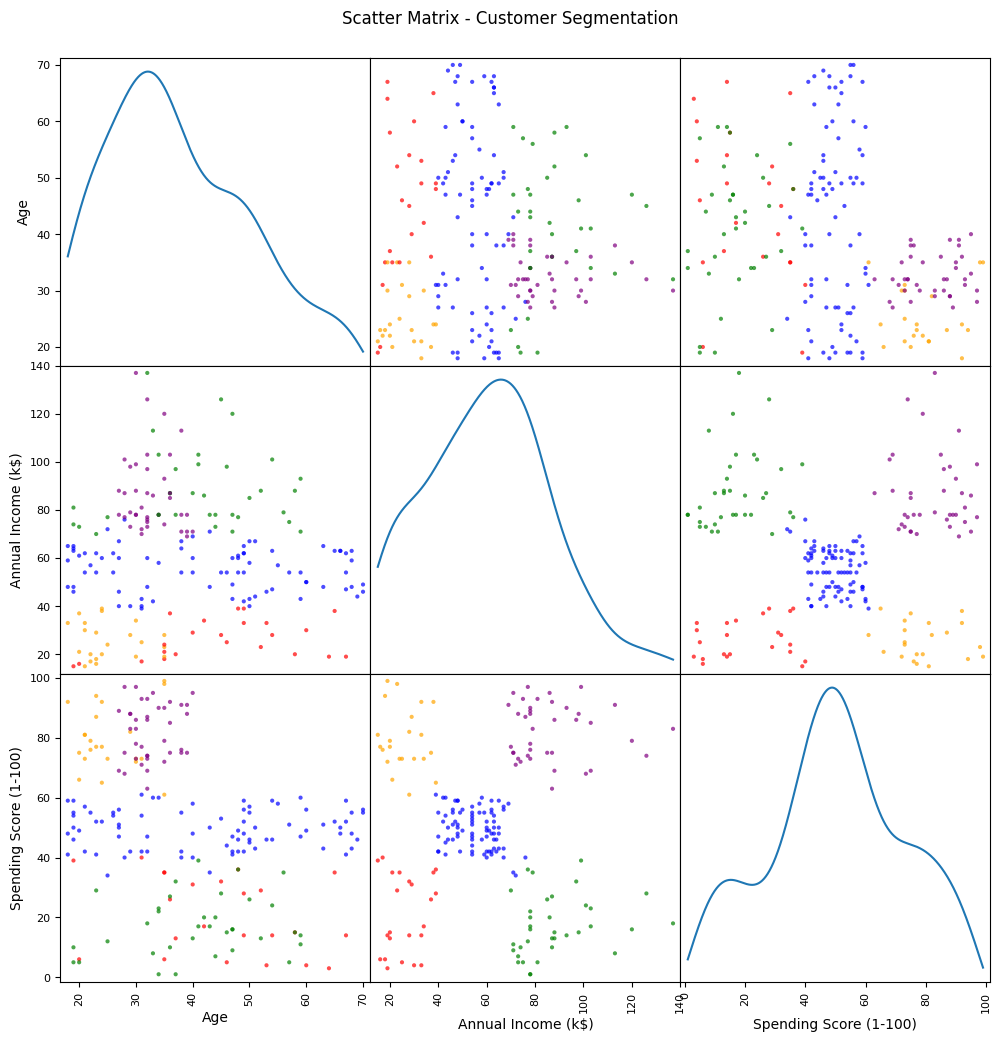

In [66]:
from pandas.plotting import scatter_matrix
plt.figure(figsize=(10, 10))
colors = ['blue', 'green', 'red', 'orange', 'purple']
scatter_matrix(mall_data.drop(['CustomerID', 'Cluster'], axis=1), alpha=0.7,
               c=mall_data['Cluster'].map(lambda x: colors[x]), figsize=(12, 12), diagonal='kde')
plt.suptitle('Scatter Matrix - Customer Segmentation', y=0.92)
plt.show()


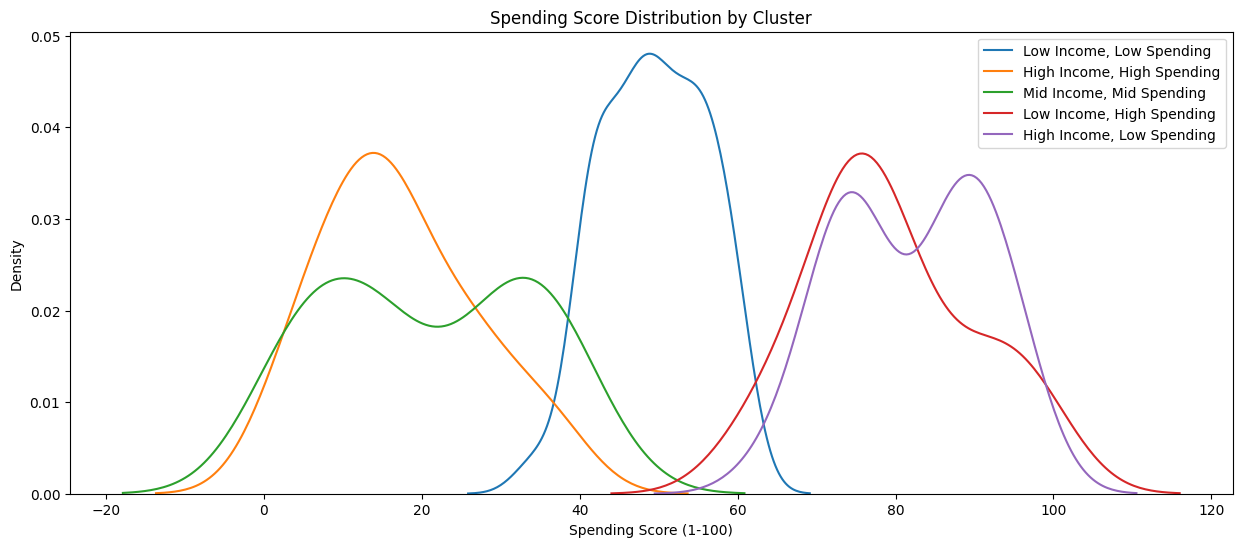

In [67]:
plt.figure(figsize=(15, 6))
for cluster in range(5):
    cluster_data = mall_data[mall_data['Cluster'] == cluster]
    sns.kdeplot(data=cluster_data['Spending Score (1-100)'], label=cluster_names[cluster])
plt.title('Spending Score Distribution by Cluster')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Density')
plt.legend()
plt.show()
